In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

In [2]:
data=pd.read_csv('Customer shopping data.csv')
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [4]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
#counting customers by gender
#gender = df.gender.value_counts().reset_index()
#gender.columns = ['Gender', 'Count']
#gender
gender = data.groupby(['gender', 'customer_id']).count().reset_index()
gender = gender.groupby('gender')['customer_id'].count().reset_index().sort_values(by = ['customer_id'], ascending = False)
gender['Percentage'] = np.round(gender.customer_id/gender.customer_id.sum() * 100)

gender


,gender,customer_id,Percentage
0,Female,59482,60.0
1,Male,39975,40.0


In [7]:
df=data.copy()
df.drop(['invoice_no', 'customer_id', 'invoice_date'], axis=1, inplace=True)
df

,gender,age,category,quantity,price,payment_method,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM
4,Female,53,Books,4,60.60,Cash,Kanyon
...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,Kanyon
99453,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul
99454,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity
99455,Male,56,Technology,4,4200.00,Cash,Istinye Park


In [8]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('--'*10)

gender
['Female' 'Male']
--------------------
category
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
--------------------
payment_method
['Credit Card' 'Debit Card' 'Cash']
--------------------
shopping_mall
['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']
--------------------


In [9]:
#checking which gender spends the most
gender_spent= df.groupby('gender')[['price']].sum().reset_index()
gender_spent

,gender,price
0,Female,4.093180e+07
1,Male,2.761956e+07


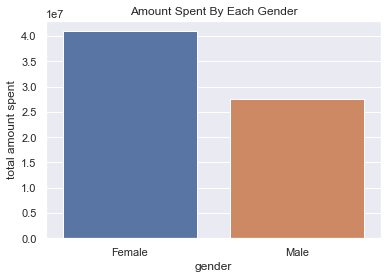

In [10]:
#Lets check amount spent by gender
sns.barplot(x='gender', y='price', data=gender_spent)
plt.title('Amount Spent By Each Gender')
plt.ylabel('total amount spent')
plt.show()

In [11]:
#Adding new column of total money spent by individual customers
df['total'] = df['price'] * df['quantity']
df.head()

,gender,age,category,quantity,price,payment_method,shopping_mall,total
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,7502.00
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53
2,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,15004.25
4,Female,53,Books,4,60.60,Cash,Kanyon,242.40


In [12]:
#New column with age group for age targeting
age_groups = [0, 18, 24, 34, 44, 54, 64, 94]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins= age_groups, labels=labels)
age_cats = pd.CategoricalDtype(['<18','18-24', '25-34', '35-44', '45-54', '55-64', '65+'], ordered = True)
df['age_group'] = df['age_group'].astype(age_cats)
df.head()

,gender,age,category,quantity,price,payment_method,shopping_mall,total,age_group
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,7502.00,25-34
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,18-24
2,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,18-24
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,15004.25,65+
4,Female,53,Books,4,60.60,Cash,Kanyon,242.40,45-54


[Text(0.5, 1.0, 'Age distribution and number of transactions')]

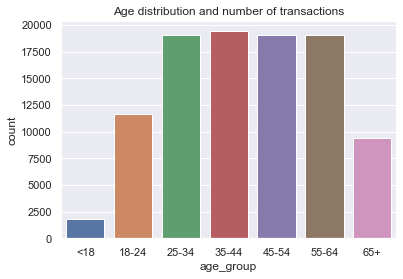

In [13]:
#Age distribution per number of transactions
sns.countplot(data=df, x='age_group').set(title='Age distribution and number of transactions')

[Text(0.5, 1.0, 'Age group and total spent')]

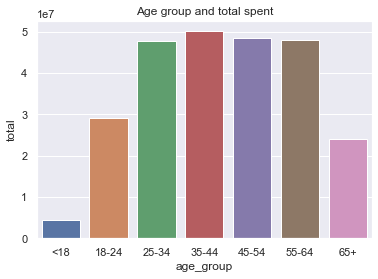

In [14]:
#Checking which age group spends more
age_group_total = df.groupby('age_group')['total'].sum().reset_index()
sns.barplot(data=age_group_total, x='age_group', y='total').set(title='Age group and total spent')

[Text(0.5, 1.0, 'Purchase Distribution By Category')]

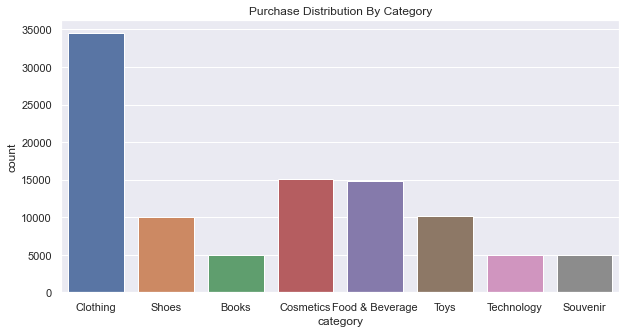

In [15]:
#Checking which category is been purchased the most
fig= plt.figure(figsize=(10,5))
sns.countplot(data=df, x='category').set(title='Purchase Distribution By Category')

[Text(0.5, 1.0, 'Total amount spent on each category')]

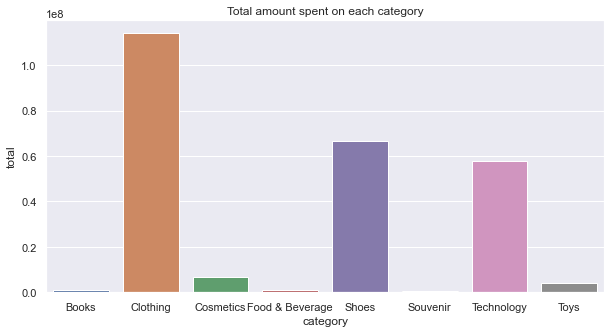

In [16]:
#Total amount spent on each category
fig = plt.figure(figsize=(10,5))
category_total_spending = df.groupby('category')['total'].sum().reset_index()
sns.barplot(data = category_total_spending, x = 'category', y = 'total').set(title='Total amount spent on each category')

[Text(0.5, 1.0, 'Most Used Payment Method')]

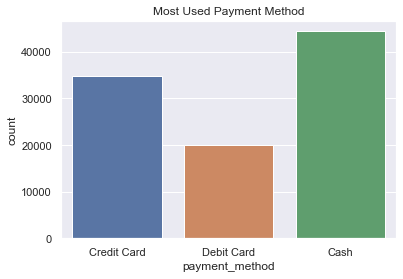

In [17]:
#Checking which payment method is mostly used
sns.countplot(data=df, x='payment_method').set(title='Most Used Payment Method')

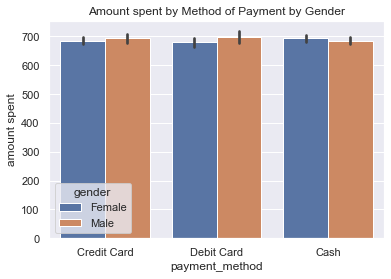

In [18]:
#Checking method of payment used by gender
sns.barplot(data = df, x= 'payment_method', y= 'price', hue= 'gender')
plt.title('Amount spent by Method of Payment by Gender')
plt.ylabel('amount spent')
plt.show()

[Text(0.5, 1.0, 'Transactions Per Shopping Mall')]

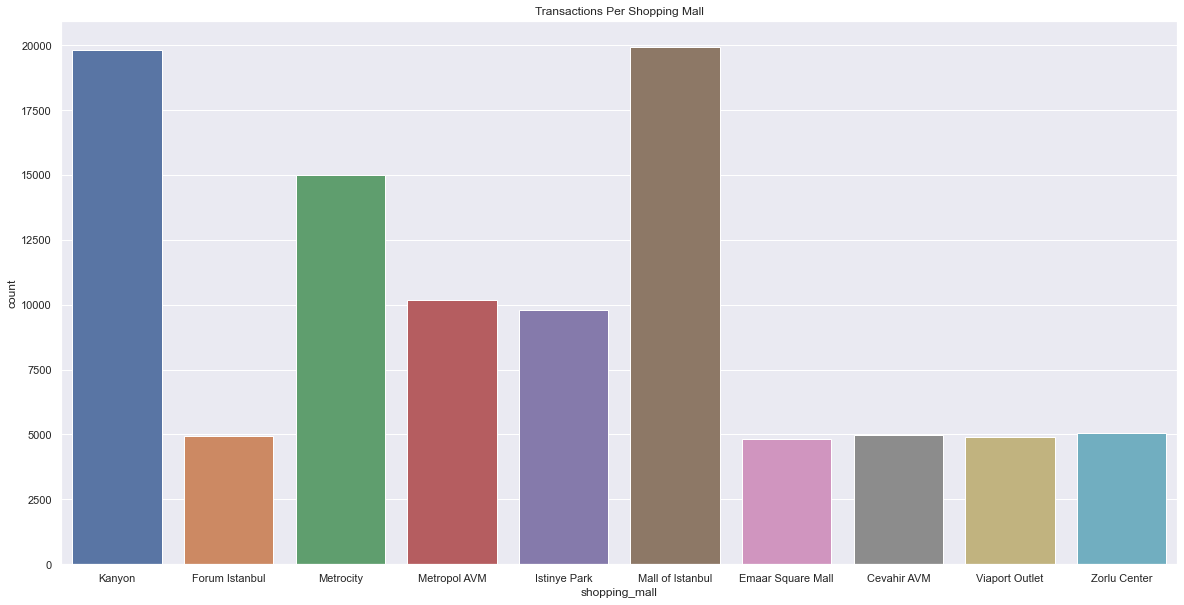

In [19]:
#Checking number of transactions per shopping mall
fig = plt.figure(figsize=(20,10),)
sns.countplot(data = df, x='shopping_mall').set(title='Transactions Per Shopping Mall')

[Text(0.5, 1.0, 'Total Amount Spent In Each Shopping Mall')]

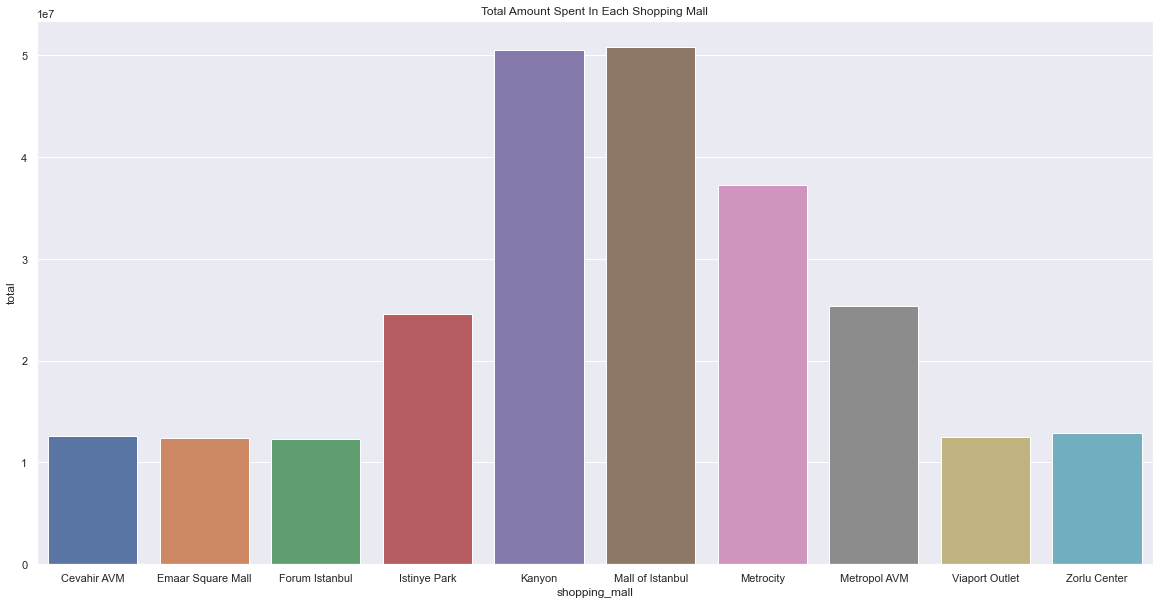

In [20]:
#Checking total amount spent in each shopping mall/shopping mall revenue
fig = plt.figure(figsize=(20,10))
shopping_mall_total = df.groupby('shopping_mall')['total'].sum().reset_index()
sns.barplot(data = shopping_mall_total, x = 'shopping_mall', y = 'total').set(title ='Total Amount Spent In Each Shopping Mall')

In [21]:
#Checking which category does age group of both gender purchase distribution
pd.crosstab([df.age_group, df.gender], df.category)

category          Books  Clothing  Cosmetics  Food & Beverage  Shoes  \
age_group gender                                                       
<18       Female     66       386        165              155    101   
          Male       40       260        102              126     70   
18-24     Female    326      2389       1024             1042    704   
          Male      255      1651        688              728    492   
25-34     Female    553      4010       1757             1644   1113   
          Male      388      2595       1154             1159    811   
35-44     Female    578      4039       1748             1787   1153   
          Male      364      2710       1164             1138    752   
45-54     Female    544      3924       1744             1674   1191   
          Male      412      2678       1186             1120    775   
55-64     Female    562      3983       1755             1653   1153   
          Male      418      2621       1174             1147    779   
65+       Female    277      1921        877              849    552   
          Male      198      1320        559              554    388   

category          Souvenir  Technology  Toys  
age_group gender                              
<18       Female        56          52    98  
          Male          52          37    78  
18-24     Female       340         341   693  
          Male         224         218   537  
25-34     Female       596         594  1207  
          Male         382         371   747  
35-44     Female       583         606  1199  
          Male         404         434   742  
45-54     Female       576         561  1141  
          Male         339         398   786  
55-64     Female       602         552  1127  
          Male         381         351   745  
65+       Female       264         275   620  
          Male         200         206   367

In [22]:
pd.crosstab([df.age_group, df.gender], df.category, values=df.total, aggfunc=np.sum, normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x))

category         Books Clothing Cosmetics Food & Beverage Shoes Souvenir  \
age_group gender                                                           
<18       Female    2%       1%        1%              1%    1%       1%   
          Male      1%       1%        1%              1%    1%       1%   
18-24     Female    7%       7%        7%              7%    7%       7%   
          Male      6%       5%        4%              5%    5%       5%   
25-34     Female   12%      12%       12%             11%   11%      12%   
          Male      7%       7%        8%              8%    8%       8%   
35-44     Female   12%      11%       12%             12%   12%      12%   
          Male      7%       8%        8%              8%    8%       8%   
45-54     Female   10%      11%       11%             11%   11%      11%   
          Male      8%       8%        8%              8%    8%       7%   
55-64     Female   11%      12%       11%             11%   11%      12%   
          Male      8%       8%        8%              8%    8%       8%   
65+       Female    6%       6%        6%              6%    5%       5%   
          Male      4%       4%        4%              4%    4%       4%   

category         Technology Toys  
age_group gender                  
<18       Female         1%   1%  
          Male           1%   1%  
18-24     Female         7%   7%  
          Male           4%   5%  
25-34     Female        11%  12%  
          Male           7%   7%  
35-44     Female        13%  12%  
          Male           9%   7%  
45-54     Female        11%  11%  
          Male           8%   8%  
55-64     Female        11%  12%  
          Male           7%   7%  
65+       Female         5%   6%  
          Male           4%   4%

## SUMMARY

#### -> From the analysis, we can say that females from the age group of 25-34, 35-44, 45-54, 55-64 spent the most money compared to other age groups and male gender, and also in the number of transactions in the shopping mall.
#### -> The most in demand category according to number of transactions are: clothing, cosmetics, and food&beverage while according to total spending, they are clothing, shoes, and technology.
#### -> The customers preferred paying with cash compared to other method of payments.
#### -> The most visited shopping malls are Mall of Instabul, Kanyon, and Metrocity.

# Customers Monthly/Yearly/Quarterly Purchase Power

In [23]:
df1 = data.copy()
df1[['day','month','year']] = df1['invoice_date'].str.split("/", expand = True).apply(pd.to_numeric)

df1['date'] = pd.to_datetime(df1[['day','month','year']])
df1['month_name'] = df1['date'].dt.month_name()
df1['day_of_week'] = df1['date'].dt.dayofweek
df1['day_name'] = df1['date'].dt.day_name()
df1.drop(columns = 'day', inplace = True)

df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,date,month_name,day_of_week,day_name
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,8,2022,2022-08-05,August,4,Friday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,12,2021,2021-12-12,December,6,Sunday
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,11,2021,2021-11-09,November,1,Tuesday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,5,2021,2021-05-16,May,6,Sunday
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,10,2021,2021-10-24,October,6,Sunday


In [24]:
df1['year_month'] = df1['date'].map(lambda date: 100*date.year + date.month)
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,date,month_name,day_of_week,day_name,year_month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,8,2022,2022-08-05,August,4,Friday,202208
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,12,2021,2021-12-12,December,6,Sunday,202112
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,11,2021,2021-11-09,November,1,Tuesday,202111
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,5,2021,2021-05-16,May,6,Sunday,202105
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,10,2021,2021-10-24,October,6,Sunday,202110


In [25]:
df1['total'] = df1['price'] * df1['quantity']
age_groups = [0, 18, 24, 34, 44, 54, 64, 94]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df1['age_group'] = pd.cut(df1['age'], bins= age_groups, labels=labels)
age_cats = pd.CategoricalDtype(['<18','18-24', '25-34', '35-44', '45-54', '55-64', '65+'], ordered = True)
df1['age_group'] = df1['age_group'].astype(age_cats)
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,date,month_name,day_of_week,day_name,year_month,total,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,8,2022,2022-08-05,August,4,Friday,202208,7502.00,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,12,2021,2021-12-12,December,6,Sunday,202112,5401.53,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,11,2021,2021-11-09,November,1,Tuesday,202111,300.08,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,5,2021,2021-05-16,May,6,Sunday,202105,15004.25,65+
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,10,2021,2021-10-24,October,6,Sunday,202110,242.40,45-54


[Text(0.5, 1.0, 'Daily Transactions')]

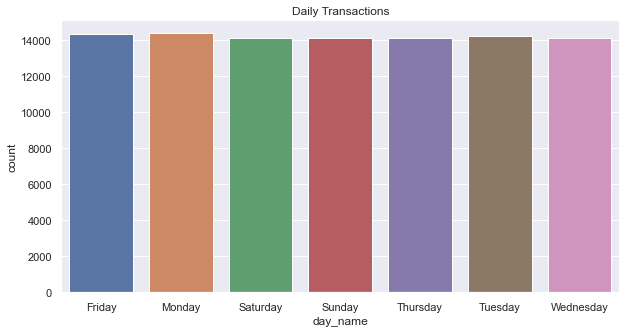

In [26]:
#Checking high and low days of customers in shopping malls
fig = plt.figure(figsize=(10,5))
df1_sorted_day_of_week = df1.sort_values(['day_name'], ascending = True, axis = 0, inplace = False)
sns.countplot(data = df1_sorted_day_of_week, x = 'day_name').set(title= 'Daily Transactions')

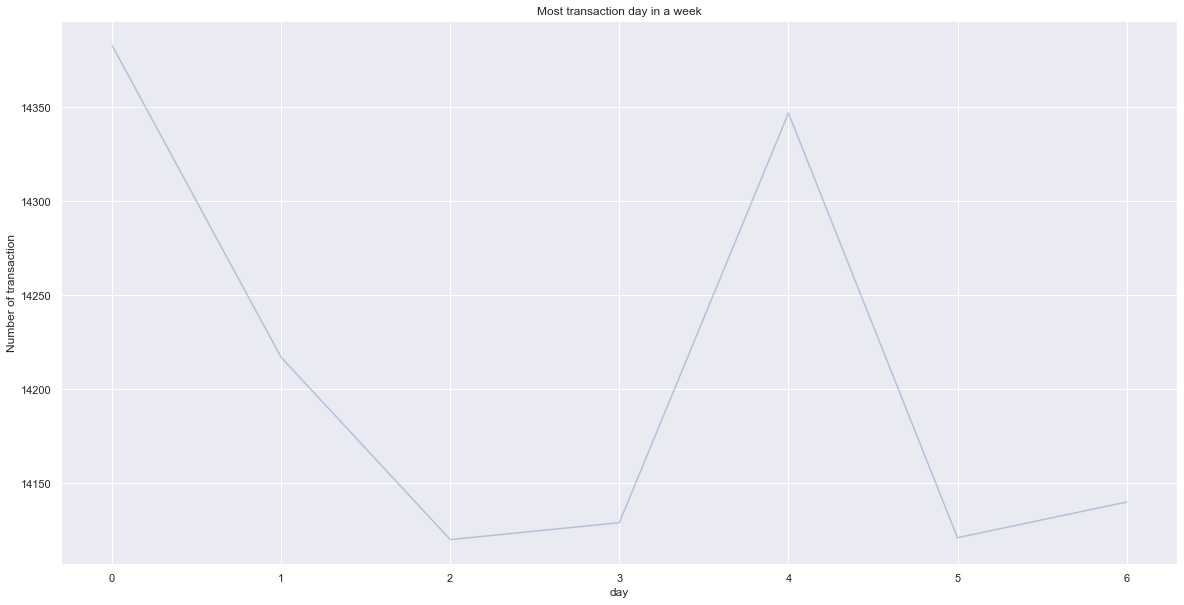

In [27]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 


df1_sorted_day_of_week = df1.sort_values(['day_of_week'], ascending=True, axis=0, inplace=False)

ax = df1_sorted_day_of_week['day_of_week'].value_counts()\
[df1_sorted_day_of_week['day_of_week'].unique()]\
.plot(kind='line',figsize=(20,10),alpha=0.35)
ax.set_title('Most transaction day in a week')
ax.set_ylabel('Number of transaction')
ax.set_xlabel('day')
plt.show()

In [28]:
#Checking the inflow of customers on a daily basis per month
pd.crosstab([df1.year, df1.month], df1.day_name)

day_name    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
year month                                                                
2021 1         585     487       628     611       534      484        506
     2         513     454       484     498       498      460        500
     3         497     614       477     506       513      605        601
     4         594     526       489     487       636      498        494
     5         509     655       587     608       507      499        483
     6         533     516       528     462       477      651        616
     7         658     517       638     550       618      478        525
     8         452     632       494     582       487      602        474
     9         548     496       477     460       594      525        570
     10        650     484       643     605       509      526        499
     11        528     635       502     510       480      605        538
     12        594     496       521     500       604      522        644
2022 1         538     613       585     574       471      546        520
     2         511     478       516     477       504      478        483
     3         493     522       521     518       661      618        614
     4         598     527       628     491       523      499        497
     5         477     640       478     615       494      641        504
     6         540     487       482     483       648      506        652
     7         630     540       618     639       483      499        484
     8         523     640       495     512       494      633        615
     9         617     505       468     506       578      508        501
     10        516     634       612     647       488      448        503
     11        486     515       456     511       526      653        618
     12        606     476       640     511       626      494        446
2023 1         522     641       505     628       530      608        492
     2         499     524       511     527       532      519        516
     3         130     129       138     122       114      112        225

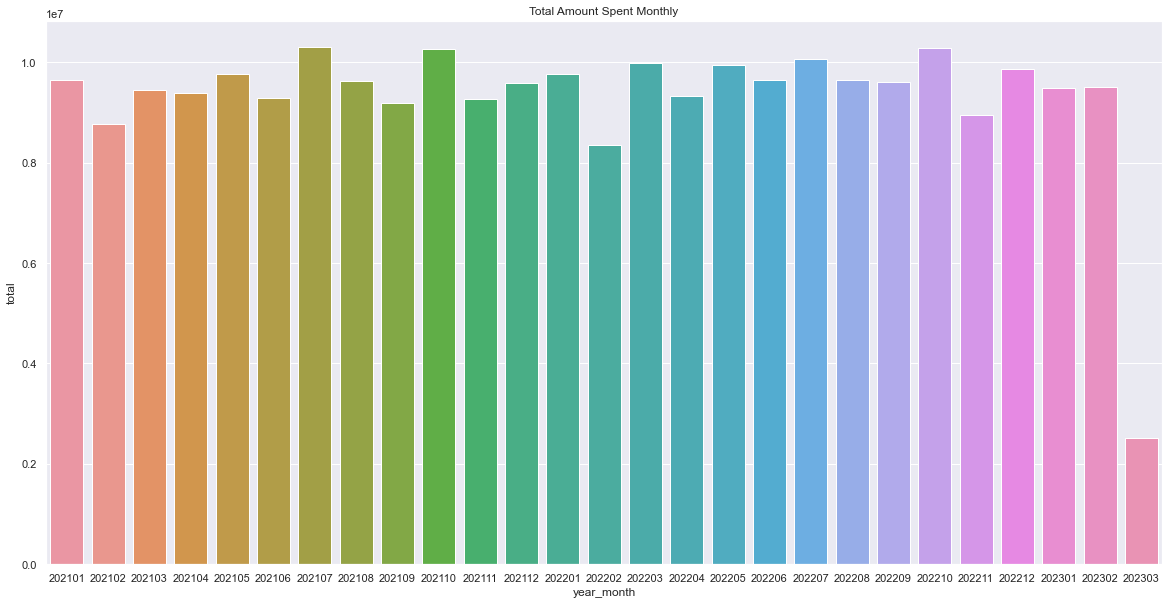

In [29]:
fig = plt.figure(figsize=(20,10))
monthly_total_sales = df1.groupby('year_month', axis = 0)['total'].sum().reset_index()
sns.barplot(data = monthly_total_sales, x = 'year_month', y = 'total').set(title ='Total Amount Spent Monthly')
plt.show()

In [30]:
yearly_sales= df1.groupby('year')[['total']].sum().reset_index()
yearly_sales

,year,total
0,2021,1.145606e+08
1,2022,1.154368e+08
2,2023,2.150841e+07


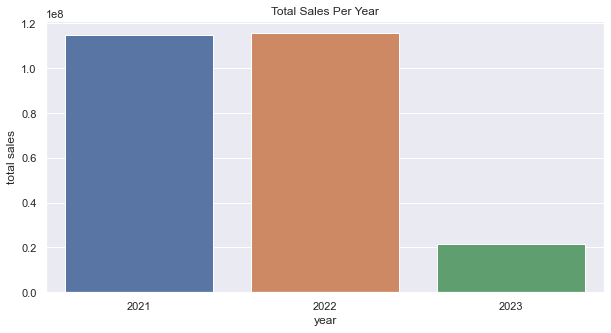

In [31]:
#Checking the year with the highest number of sales
fig = plt.figure(figsize=(10,5))
yearly_sales = df1.groupby('year', axis = 0)['total'].sum().reset_index()
sns.barplot( data = yearly_sales, x = 'year', y = 'total').set(title = 'Total Sales Per Year')
plt.ylabel('total sales')
plt.show()

In [32]:
df1['quarter'] = pd.PeriodIndex(df1['date'], freq = 'Q')
df1['quarter'] = df1['quarter'].astype('string')
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,date,month_name,day_of_week,day_name,year_month,total,age_group,quarter
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,8,2022,2022-08-05,August,4,Friday,202208,7502.00,25-34,2022Q3
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,12,2021,2021-12-12,December,6,Sunday,202112,5401.53,18-24,2021Q4
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,11,2021,2021-11-09,November,1,Tuesday,202111,300.08,18-24,2021Q4
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,5,2021,2021-05-16,May,6,Sunday,202105,15004.25,65+,2021Q2
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,10,2021,2021-10-24,October,6,Sunday,202110,242.40,45-54,2021Q4


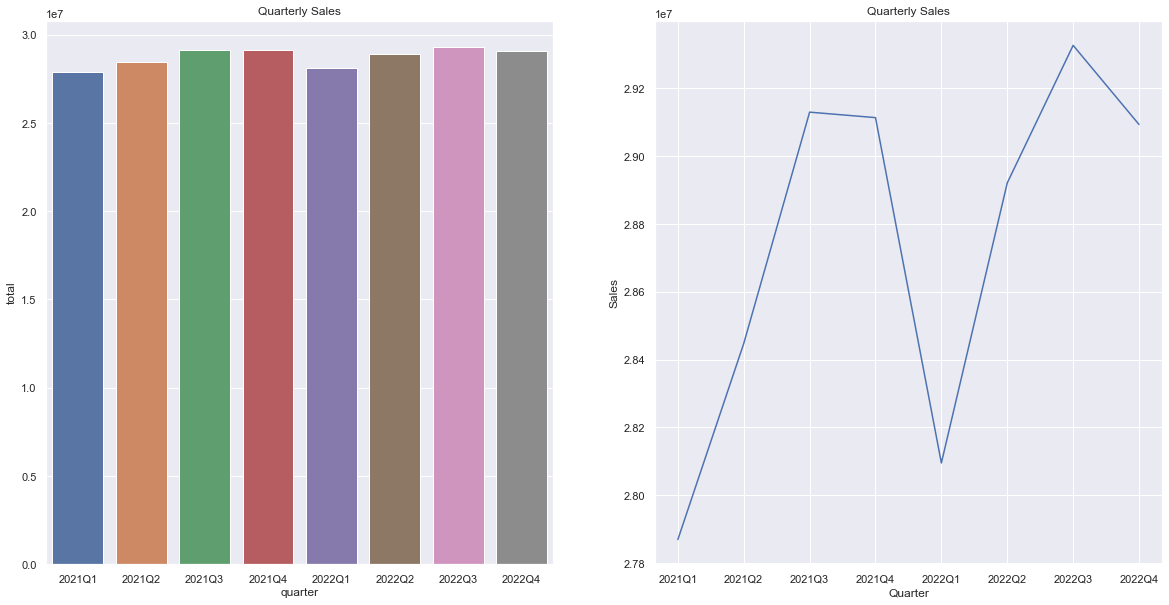

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10))
data_no_2023 = df1.loc[df1['date'] < '2023-01-01']
quarter_pivot_table = pd.pivot_table( data = data_no_2023, index = data_no_2023['quarter'], values = 'total', aggfunc = 'sum')
sns.barplot(data = quarter_pivot_table, x = quarter_pivot_table.index, y ='total', ax = ax1).set(title = 'Quarterly Sales')
sns.lineplot( data = quarter_pivot_table, x = quarter_pivot_table.index, y ='total', ax = ax2).set(title = 'Quarterly Sales')
plt.ylabel('Sales')
plt.xlabel('Quarter')
plt.show()